## Data Exploration/Visualization
This notebook is used to explore the data and produce preliminary visualizations of the data.

### Questions about the data
#### What is the unit of observation?
Each row in the dataset refers to a patient, as the unit of observation in this data is at the patient-level.
#### What is the coverage of the data?
The data covers 686 individuals from one of two categories: dementia, no dementia. The individuals all reside in Jatinangor, Indonesia.
#### Who put the data together?
This dataset comes from a research study sponsored by the National Institute of Health (NIH). Specifically, this dataset comes from "Dementia Prevalence, Comorbidities, and Lifestyle Among Jatinangor Elders", a published research study in the Front Neurol Journal. It was published online on July 23, 2021 (doi: 10.3389/fneur.2021.643480).

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8345013/
#### How was the data generated?
"All data were obtained in one seat by 15 trained, third-year medical school students and five neurology residents for field neurological examination consultation. Blood samples were drawn on another day."
#### Is the data complete?
Missingness in the data was explored in the data_cleaning notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.groupby.grouper import get_grouper
import pylab as pl

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
dta = pd.read_csv('data/clean_data.csv')
dta_dummy = pd.read_csv('data/dummy_data.csv')
dta.head(10)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Vegetable,Vegetable_category,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent
5,80006,Dementia,78.0,>75,0.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,1 time/day,Frequent,Few times/week,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent
6,80007,Normal,75.0,>75,6.0,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
7,80009,Normal,64.0,60-74,4.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
8,80010,Dementia,66.0,60-74,2.0,0-6 years,Female,Single,No Income,notworking,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
9,80011,Dementia,73.0,60-74,0.0,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent


In [4]:
# Check size of dataframe
dta.shape

(686, 78)

In [5]:
# Check data types
dta.dtypes

Participant_ID               int64
Category                    object
Age_yrs                    float64
Age_category                object
Education_yrs              float64
                            ...   
Salted_fish_category        object
Instant_noodle              object
Instant_noodle_category     object
Tempe                       object
Tempe_category              object
Length: 78, dtype: object

In [6]:
# Changing variable types
dta.Category = dta.Category.astype('category')
dta.Age_category = dta.Age_category.astype('category')
dta.Education_category = dta.Education_category.astype('category')
dta.Sex = dta.Sex.astype('category')
dta.Marital_status = dta.Marital_status.astype('category')
dta.Income = dta.Income.astype('category')
dta.Occupation_class = dta.Occupation_class.astype('category')
dta.Living_area = dta.Living_area.astype('category')
dta.BMI = dta.BMI.astype('float')
dta.Hypertension = dta.Hypertension.astype('category')
dta.BMI_category = dta.BMI_category.astype('category')
dta.Diabetes = dta.Diabetes.astype('category')
dta.Tri_200 = dta.Tri_200.astype('category')
dta.HDL_40 = dta.HDL_40.astype('category')
dta.Smoking_status = dta.Smoking_status.astype('category')
dta.Stroke = dta.Stroke.astype('category')
dta.Depression = dta.Depression.astype('category')
dta.Intellectual_1 = dta.Intellectual_1.astype('category')
dta.Intellectual_2 = dta.Intellectual_2.astype('category')
dta.Intellectual_3 = dta.Intellectual_3.astype('category')
dta.Intellectual_4 = dta.Intellectual_4.astype('category')
dta.Intellectual_5 = dta.Intellectual_5.astype('category')
dta.Intellectual_6 = dta.Intellectual_6.astype('category')
dta.Intellectual_7 = dta.Intellectual_7.astype('category')
dta.Intellectual_8 = dta.Intellectual_8.astype('category')
dta.Social_1 = dta.Social_1.astype('category')
dta.Social_2 = dta.Social_2.astype('category')
dta.Social_3 = dta.Social_3.astype('category')
dta.Social_4 = dta.Social_4.astype('category')
dta.Social_5 = dta.Social_5.astype('category')
dta.Social_6 = dta.Social_6.astype('category')
dta.Social_7 = dta.Social_7.astype('category')
dta.Social_8 = dta.Social_8.astype('category')
dta.Social_9 = dta.Social_9.astype('category')
dta.Recreational_1 = dta.Recreational_1.astype('category')
dta.Recreational_2 = dta.Recreational_2.astype('category')
dta.Recreational_3 = dta.Recreational_3.astype('category')
dta.Recreational_4 = dta.Recreational_4.astype('category')
dta.Recreational_5 = dta.Recreational_5.astype('category')
dta.Recreational_6 = dta.Recreational_6.astype('category')
dta.Recreational_7 = dta.Recreational_7.astype('category')
dta.Recreational_8 = dta.Recreational_8.astype('category')
dta.Physical_1 = dta.Physical_1.astype('category')
dta.Physical_2 = dta.Physical_2.astype('category')
dta.Physical_3 = dta.Physical_3.astype('category')
dta.Physical_4 = dta.Physical_4.astype('category')
dta.Physical_5 = dta.Physical_5.astype('category')
dta.Intellectually_active = dta.Intellectually_active.astype('category')
dta.Socially_active = dta.Socially_active.astype('category')
dta.Recreationally_active = dta.Recreationally_active.astype('category')
dta.Physically_active = dta.Physically_active.astype('category')
dta.Total_active = dta.Total_active.astype('category')
dta.Carbohydrate = dta.Carbohydrate.astype('category')
dta.Carbo_category = dta.Carbo_category.astype('category')
dta.Protein = dta.Protein.astype('category')
dta.Protein_category = dta.Protein_category.astype('category')
dta.Vegetable = dta.Vegetable.astype('category')
dta.Vegetable_category = dta.Vegetable_category.astype('category')
dta.Fruit = dta.Fruit.astype('category')
dta.Fruit_category = dta.Fruit_category.astype('category')
dta.Salted_fish = dta.Salted_fish.astype('category')
dta.Salted_fish_category = dta.Salted_fish_category.astype('category')
dta.Instant_noodle = dta.Instant_noodle.astype('category')
dta.Instant_noodle_category = dta.Instant_noodle_category.astype('category')
dta.Tempe = dta.Tempe.astype('category')
dta.Tempe_category = dta.Tempe_category.astype('category')

In [7]:
dta.dtypes

Participant_ID                int64
Category                   category
Age_yrs                     float64
Age_category               category
Education_yrs               float64
                             ...   
Salted_fish_category       category
Instant_noodle             category
Instant_noodle_category    category
Tempe                      category
Tempe_category             category
Length: 78, dtype: object

In [8]:
# Categorical summaries of each categorical variable
dta.describe(include='category').T

,count,unique,top,freq
Category,686,2,Normal,486
Age_category,676,2,60-74,515
Education_category,661,2,0-6 years,543
Sex,686,2,Female,390
Marital_status,629,2,Married,420
...,...,...,...,...
Salted_fish_category,537,2,Frequent,280
Instant_noodle,523,5,Few times/week,151
Instant_noodle_category,523,2,Frequent,372
Tempe,530,5,Everyday,207


In [9]:
# Breakdown of ages in the dataset
dta.Age_yrs.value_counts()

63.0    49
73.0    49
68.0    46
65.0    45
60.0    41
64.0    40
66.0    36
61.0    34
67.0    33
78.0    30
62.0    29
69.0    27
71.0    25
72.0    22
75.0    21
74.0    20
70.0    19
83.0    16
76.0    16
77.0    15
80.0    12
81.0    11
82.0    11
87.0     6
86.0     6
79.0     5
88.0     4
90.0     3
85.0     2
84.0     1
93.0     1
91.0     1
Name: Age_yrs, dtype: int64

In [10]:
# Breakdown of categories - dementia vs. no dementia
dta.Category.value_counts()

Normal      486
Dementia    200
Name: Category, dtype: int64

In [11]:
# Cross tabs represented as proportions (by column)
pd.crosstab(dta.Category,dta.Age_yrs,margins=True).apply(lambda x: x/x.sum(), axis=0).round(3) 

Age_yrs,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,...,83.0,84.0,85.0,86.0,87.0,88.0,90.0,91.0,93.0,All
Category,,,,,,,,,,,,,,,,,,,,,
Dementia,0.098,0.059,0.017,0.092,0.062,0.122,0.139,0.045,0.076,0.111,...,0.406,0.0,0.25,0.167,0.083,0.25,0.0,0.5,0.5,0.145
Normal,0.402,0.441,0.483,0.408,0.438,0.378,0.361,0.455,0.424,0.389,...,0.094,0.5,0.25,0.333,0.417,0.25,0.5,0.0,0.0,0.355
All,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,...,0.500,0.5,0.50,0.500,0.500,0.50,0.5,0.5,0.5,0.500


## Data Visualization

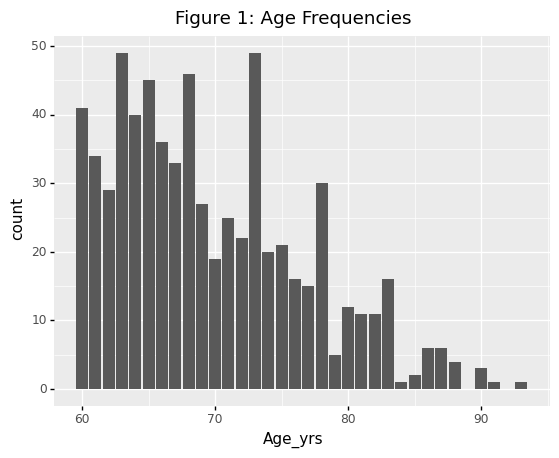

<ggplot: (8772003456826)>

In [37]:
p = (ggplot(dta,aes(x='Age_yrs')) +
  geom_bar()) + ggtitle("Figure 1: Age Frequencies")
display(p)
ggsave(plot = p, filename = 'age_frequency', path = "/Users/morganzimmerman/Desktop/Problem_Sets/DATA_SCIENCE/final_project/alzheimers_project/visuals")

In [13]:
age_avgscore = dta.groupby('Age_yrs', as_index=False)['AMT'].mean()

Text(0, 0.5, 'Average AMT Score')

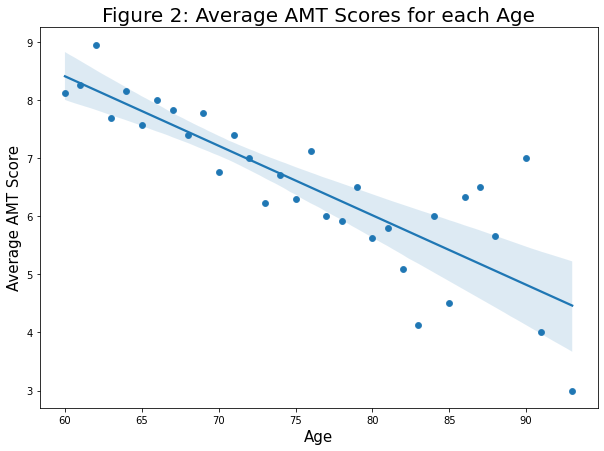

In [33]:
age_amt = age_avgscore.plot.scatter(x='Age_yrs',
                      y='AMT',
                      figsize=(10, 7))
sns.regplot('Age_yrs', 'AMT', data = age_avgscore)
plt.title('Figure 2: Average AMT Scores for each Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Average AMT Score', fontsize=15)

In [15]:
x=age_avgscore['Age_yrs'].to_numpy().reshape((-1, 1))
y=age_avgscore['AMT'].to_numpy()
model1 = LinearRegression()
model1.fit(x, y)

LinearRegression()

In [16]:
r_sq1 = model1.score(x, y)
print('coefficient of determination:', r_sq1)

coefficient of determination: 0.7011642281300936


In [17]:
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

intercept: 15.603663867477344
slope: [-0.11978442]


In [18]:
dta1 = dta.dropna()
x=dta1['Age_yrs'].to_numpy().reshape((-1, 1))
y=dta1['AMT'].to_numpy()
model2 = LinearRegression()
model2.fit(x, y)

LinearRegression()

In [19]:
r_sq2 = model2.score(x, y)
print('coefficient of determination:', r_sq2)

coefficient of determination: 0.09831308292273855


In [20]:
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

intercept: 15.052834007102824
slope: [-0.11147406]


In [21]:
dta.columns

Index(['Participant_ID', 'Category', 'Age_yrs', 'Age_category',
       'Education_yrs', 'Education_category', 'Sex', 'Marital_status',
       'Income', 'Occupation_class', 'Living_area', 'BP_sistol', 'BP_diastol',
       'BMI', 'GDS', 'Glucose', 'Triglyceride', 'HDL', 'Hypertension',
       'BMI_category', 'Diabetes', 'Tri_200', 'HDL_40', 'Smoking_status',
       'Stroke', 'Depression', 'INA_AD8', 'ADL', 'AMT', 'Intellectual_1',
       'Intellectual_2', 'Intellectual_3', 'Intellectual_4', 'Intellectual_5',
       'Intellectual_6', 'Intellectual_7', 'Intellectual_8', 'Social_1',
       'Social_2', 'Social_3', 'Social_4', 'Social_5', 'Social_6', 'Social_7',
       'Social_8', 'Social_9', 'Recreational_1', 'Recreational_2',
       'Recreational_3', 'Recreational_4', 'Recreational_5', 'Recreational_6',
       'Recreational_7', 'Recreational_8', 'Physical_1', 'Physical_2',
       'Physical_3', 'Physical_4', 'Physical_5', 'Intellectually_active',
       'Socially_active', 'Recreationally_act

In [22]:
cat_dummies = pd.get_dummies(dta.Category)
dta = pd.concat([dta.drop(['Category'],axis=1),cat_dummies],axis=1)
dta.head()

,Participant_ID,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,Living_area,...,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category,Dementia,Normal
0,80001,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,Rural,...,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,1,0
1,80002,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,Rural,...,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,0,1
2,80003,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,Rural,...,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN,0,1
3,80004,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,Rural,...,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent,0,1
4,80005,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,Rural,...,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,1,0


In [23]:
dta_dummy.columns

Index(['Participant_ID', 'Age_yrs', 'Education_yrs', 'BP_sistol', 'BP_diastol',
       'BMI', 'GDS', 'Glucose', 'Triglyceride', 'HDL',
       ...
       'Vegetable_category_Frequent', 'Vegetable_category_Non Frequent',
       'Fruit_category_Frequent', 'Fruit_category_Non Frequent',
       'Salted_fish_category_Frequent', 'Salted_fish_category_Non-Frequent',
       'Instant_noodle_category_Frequent',
       'Instant_noodle_category_Non-Frequent', 'Tempe_category_Frequent',
       'Tempe_category_Non-Frequent'],
      dtype='object', length=111)

In [24]:
temp_means = dta_dummy[['Category_Dementia', 'Age_yrs', 'Education_yrs', 'AMT']]

In [25]:
print(temp_means.groupby('Category_Dementia').mean())

                     Age_yrs  Education_yrs       AMT
Category_Dementia                                    
0                  68.293750       6.070815  8.265351
1                  72.994898       3.605128  4.532967


Explanation of above results: The average age among those without dementia is 68 years, and the average age among those with dementia is slightly higher at an age of just under 73. Individuals without dementia are averaging around 6 years of formal education, whereas those with dementia only average around 3-4 years. Lastly, the Abbreviated Mental Test score (AMTS) is a 10-point test for rapidly assessing elderly patients for the possibility of dementia. As you can see, individuals without dementia are scoring nearly double the number of points as individuals living with dementia.

In [26]:
temp_counts = dta_dummy[['Category_Dementia', 'Sex_Female', 'Sex_Male', 
                        'Living_area_Rural', 'Living_area_Sub-Urban', 
                         'Income_< monthly minimum wage',
                        'Income_No Income','Income_≥ monthly minimum wage',
                        'Marital_status_Married', 'Occupation_class_housewife',
                         'Occupation_class_labour', 'Occupation_class_notworking',
                         'Occupation_class_profesional', 'Hypertension_Hypertension',
                         'BMI_category_Normal', 'BMI_category_Obesitas', 
                         'BMI_category_Overweight', 'BMI_category_Underweight',
                        'Diabetes_Diabetes', 'Tri_200_High Risk', 'HDL_40_High Risk',
                        'Smoking_status_Smoking', 'Stroke_stroke', 'Depression_Depression',
                        'Intellectually_active_less active', 'Socially_active_less active',
                        'Recreationally_active_less active', 'Physically_active_less active',
                        'Total_active_less active']]

In [27]:
temp_counts.groupby('Category_Dementia').sum()

,Sex_Female,Sex_Male,Living_area_Rural,Living_area_Sub-Urban,Income_< monthly minimum wage,Income_No Income,Income_≥ monthly minimum wage,Marital_status_Married,Occupation_class_housewife,Occupation_class_labour,...,Tri_200_High Risk,HDL_40_High Risk,Smoking_status_Smoking,Stroke_stroke,Depression_Depression,Intellectually_active_less active,Socially_active_less active,Recreationally_active_less active,Physically_active_less active,Total_active_less active
Category_Dementia,,,,,,,,,,,,,,,,,,,,,
0,254,232,169,317,99,205,125,327,128,67,...,27,53,169,8,18,312,228,257,413,244
1,136,64,110,90,30,110,29,93,49,24,...,8,12,52,9,22,174,131,113,182,108


In [28]:
temp_activity = dta_dummy[['Category_Dementia', 'Intellectually_active_less active', 
                           'Intellectually_active_active', 'Socially_active_less active',
                        'Recreationally_active_less active', 'Physically_active_less active',
                        'Total_active_less active']]

In [29]:
temp_activity.groupby('Category_Dementia').sum()

,Intellectually_active_less active,Intellectually_active_active,Socially_active_less active,Recreationally_active_less active,Physically_active_less active,Total_active_less active
Category_Dementia,,,,,,
0,312,174,228,257,413,244
1,174,24,131,113,182,108


In [30]:
dta_dementia = dta_dummy.loc[dta_dummy['Category_Dementia'] == 1]
dta_dementia['Category_Dementia']

0      1
4      1
5      1
8      1
9      1
      ..
661    1
673    1
674    1
677    1
679    1
Name: Category_Dementia, Length: 200, dtype: int64

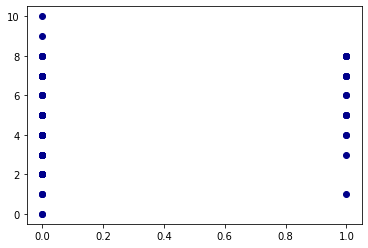

In [31]:
plot = plt.scatter(dta_dementia.Intellectually_active_active, dta_dementia.AMT, c='DarkBlue')

Text(0.5, 0.98, 'Distribution of Cognitive AMT Scores for Individuals without (0) and with (1) Dementia')

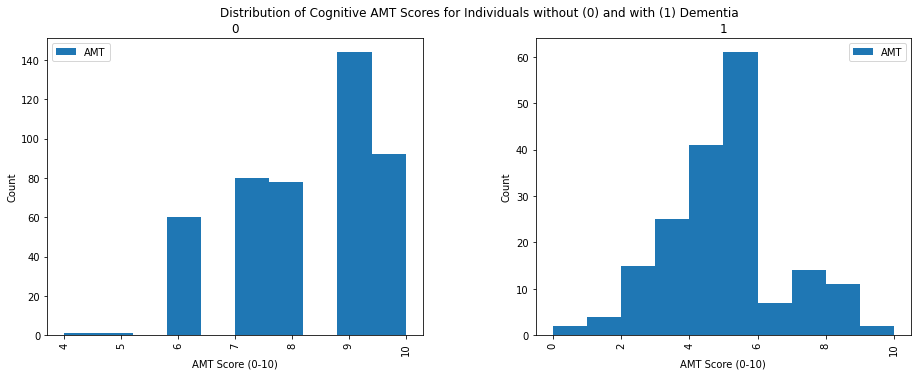

In [32]:
dementia_AMTs = dta_dummy.hist(column='AMT', 
                               by='Category_Dementia', 
                               figsize=(15, 5.5),
                               legend=True)
for amt in dementia_AMTs.flatten():
    amt.set_xlabel("AMT Score (0-10)")
    amt.set_ylabel("Count")
pl.suptitle('Distribution of Cognitive AMT Scores for Individuals without (0) and with (1) Dementia')